In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

    Read in the data and check for any abnormalities.


In [3]:
df = pd.read_csv('yellow_tripdata_2017-06.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


In [4]:
df.shape

(9656993, 17)

In [5]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

    Only going to keep trips that are have credit card or cash transaction.


In [7]:
df[(df['payment_type'] == 1) | (df['payment_type'] == 2)].shape

(9588771, 17)

In [8]:
df = df[(df['payment_type'] == 1) | (df['payment_type'] == 2)]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,9588771.0,1.550363,0.497457,1.00,1.00,2.00,2.00,2.00
passenger_count,9588771.0,1.626414,1.267206,0.00,1.00,1.00,2.00,9.00
trip_distance,9588771.0,2.979163,5.705656,0.00,1.00,1.68,3.10,9496.98
RatecodeID,9588771.0,1.043940,0.535112,1.00,1.00,1.00,1.00,99.00
PULocationID,9588771.0,162.650327,66.738822,1.00,114.00,162.00,233.00,265.00
DOLocationID,9588771.0,160.768571,70.459660,1.00,107.00,162.00,233.00,265.00
payment_type,9588771.0,1.320569,0.466695,1.00,1.00,1.00,2.00,2.00
fare_amount,9588771.0,13.293072,215.884864,-52.00,6.50,9.50,15.00,630461.82
extra,9588771.0,0.341601,0.461496,-50.56,0.00,0.00,0.50,22.50
mta_tax,9588771.0,0.497842,0.070734,-0.50,0.50,0.50,0.50,140.00


    Going to address the negative fares

In [11]:
df[df['total_amount']<0].shape

(22, 17)

In [12]:
df[df['total_amount']<0].describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,22.0,2.000000,0.000000e+00,2.0,2.000,2.00,2.00,2.00
passenger_count,22.0,2.954545,1.987515e+00,1.0,1.000,2.00,5.00,6.00
trip_distance,22.0,0.283636,2.985927e-01,0.0,0.040,0.11,0.53,0.97
RatecodeID,22.0,1.181818,5.010811e-01,1.0,1.000,1.00,1.00,3.00
PULocationID,22.0,177.681818,6.270671e+01,48.0,138.750,174.50,236.00,264.00
DOLocationID,22.0,165.227273,6.730240e+01,48.0,117.750,163.00,234.75,264.00
payment_type,22.0,2.000000,0.000000e+00,2.0,2.000,2.00,2.00,2.00
fare_amount,22.0,-8.886364,1.449050e+01,-52.0,-4.875,-3.50,-2.50,-2.50
extra,22.0,-0.340909,3.581156e-01,-1.0,-0.500,-0.50,0.00,0.00
mta_tax,22.0,-0.477273,1.066004e-01,-0.5,-0.500,-0.50,-0.50,0.00


In [13]:
# There is a small number of trips with negative dollar amounts and questionable trip distance
# This data will be dropped
df[df['total_amount']<0].shape[0]/df.shape[0]

2.2943503395794937e-06

In [14]:
df = df[df['total_amount']>=0]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,9588749.0,1.550362,0.497457,1.00,1.00,2.00,2.00,2.00
passenger_count,9588749.0,1.626411,1.267202,0.00,1.00,1.00,2.00,9.00
trip_distance,9588749.0,2.979169,5.705661,0.00,1.00,1.68,3.10,9496.98
RatecodeID,9588749.0,1.043940,0.535112,1.00,1.00,1.00,1.00,99.00
PULocationID,9588749.0,162.650292,66.738830,1.00,114.00,162.00,233.00,265.00
DOLocationID,9588749.0,160.768561,70.459670,1.00,107.00,162.00,233.00,265.00
payment_type,9588749.0,1.320568,0.466695,1.00,1.00,1.00,2.00,2.00
fare_amount,9588749.0,13.293123,215.885108,0.00,6.50,9.50,15.00,630461.82
extra,9588749.0,0.341602,0.461495,-50.56,0.00,0.00,0.50,22.50
mta_tax,9588749.0,0.497844,0.070718,0.00,0.50,0.50,0.50,140.00


    The max and min values of the total_amount looks off as well, going to dive deeper to better understand what is happening.

In [16]:
df.sort_values(by='total_amount', ascending = False).head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5773420,1,2017-06-20 22:34:58,2017-06-20 22:39:16,1,0.80,1,N,141,141,2,630461.82,0.50,0.50,0.0,0.00,0.3,630463.12
6007639,1,2017-06-21 16:58:30,2017-06-21 17:26:05,1,0.00,1,N,158,161,2,218316.30,0.49,0.00,0.0,0.00,0.3,218317.09
5640037,2,2017-06-20 15:21:21,2017-06-22 11:19:32,1,9496.98,1,N,193,193,2,9999.99,0.00,0.00,0.0,0.00,0.0,9999.99
5203847,2,2017-06-19 09:02:27,2017-06-20 15:20:43,1,6545.78,1,N,193,193,2,9999.99,0.00,0.00,0.0,0.00,0.0,9999.99
4201741,2,2017-06-16 11:47:32,2017-06-19 08:58:12,1,4942.40,1,N,193,193,2,9999.99,0.00,0.00,0.0,0.00,0.0,9999.99
9218988,2,2017-06-09 16:01:22,2017-06-10 09:48:14,1,4208.94,1,N,193,193,2,9999.99,0.00,0.00,0.0,0.00,0.0,9999.99
473417,1,2017-06-11 01:21:35,2017-06-11 01:40:50,1,7.00,1,N,264,264,2,8018.00,-50.56,51.36,0.0,0.00,0.0,8018.80
2427507,1,2017-06-08 11:14:26,2017-06-08 11:27:24,1,3.30,1,N,45,66,2,3010.80,-31.61,32.41,0.0,0.00,0.0,3011.60
2767752,1,2017-06-11 21:45:24,2017-06-11 21:45:24,1,0.00,1,N,65,264,2,1265.50,0.50,0.50,0.0,0.00,0.3,1266.80
6326359,1,2017-06-28 12:41:03,2017-06-28 12:41:03,2,0.00,1,N,233,264,2,14.00,0.00,0.50,0.0,990.00,0.3,1004.80


    There are some abnormal values in the tolls and total fares amounts, I will cut the data and drop the outliers at the top 99th percentiles and 1st percentile.

In [17]:
ninety_nine = df['total_amount'].quantile(.99)
one = df['total_amount'].quantile(.01)

print('99th percentile is: ', ninety_nine, '1st percentile is:', one)

99th percentile is:  70.27 1st percentile is: 4.8


In [18]:
df = df[(df['total_amount']>=one) & (df['total_amount']<=ninety_nine)]

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,9407758.0,1.550020,0.497492,1.00,1.00,2.00,2.00,2.00
passenger_count,9407758.0,1.627163,1.267806,0.00,1.00,1.00,2.00,9.00
trip_distance,9407758.0,2.866152,3.429475,0.00,1.00,1.68,3.08,301.10
RatecodeID,9407758.0,1.028250,0.437621,1.00,1.00,1.00,1.00,99.00
PULocationID,9407758.0,162.699539,66.760343,1.00,114.00,162.00,233.00,265.00
DOLocationID,9407758.0,160.921307,70.122853,1.00,107.00,162.00,233.00,265.00
payment_type,9407758.0,1.317363,0.465450,1.00,1.00,1.00,2.00,2.00
fare_amount,9407758.0,12.768666,9.890026,0.00,6.50,9.50,14.50,70.26
extra,9407758.0,0.336676,0.424128,-0.49,0.00,0.00,0.50,22.50
mta_tax,9407758.0,0.499431,0.028517,0.00,0.50,0.50,0.50,43.00


    This looks relatively normal to start putting together driver's take of the fare. 


In [20]:
# Going to calculate driver's take of the fare net tip since that's only included for credit card 
# transactions and we have both credit card and cash
# driver_fare = fare_amount + extra

df['driver_fare'] = df['fare_amount'] + df['extra']
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,driver_fare
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16,8.5
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14,7.0
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30,22.5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9407758 entries, 0 to 9656992
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
driver_fare              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.3+ GB


In [22]:
# Converting to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [23]:
# Extracting day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [24]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,driver_fare,day_of_week,hour
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16,8.5,Thursday,7
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14,7.0,Thursday,8
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30,22.5,Thursday,8


    Going to start creating the dow-hour pivot tables


In [25]:
# Sum of driver_fare - all
driver_fares_df = df.pivot_table(values = 'driver_fare', index = 'hour', columns='day_of_week', aggfunc='sum')
driver_fares_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,885314.13,399727.74,939105.75,862905.76,713219.90,394885.78,482478.58
1,571142.30,240753.46,750340.37,717387.02,403608.72,222507.70,263554.59
2,334968.73,145179.79,559564.24,593397.97,226826.71,130617.37,152178.21
3,224130.12,102392.55,428476.00,466575.38,153924.20,92872.61,99695.00
4,224888.71,142314.53,297643.90,331801.91,165499.79,105736.61,118249.61
5,281131.61,230723.72,176271.50,182076.60,246396.99,191288.89,188313.08
6,500364.88,429569.61,217230.10,193855.23,498550.15,396378.43,391179.86
7,775861.62,649732.66,301603.52,242617.26,832298.78,671497.56,687441.30
8,1021185.04,798521.44,389256.75,316501.32,1053755.79,879068.98,883895.92


In [26]:
# Sum of tipms and scaled to account for cash tips, going to assume that people tip the same of card as cash
tip_amount_df = df[df['payment_type']==1].pivot_table(values = 'tip_amount', index = 'hour', columns='day_of_week', aggfunc='sum')/ df[df['payment_type']==1]['payment_type'].count() * df['payment_type'].count() 

tip_amount_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,185498.680309,73702.768535,189595.340827,167313.804481,149240.876959,78442.450630,100887.177781
1,113824.663532,41720.241993,150948.374286,140983.905651,79410.022683,41037.433500,50124.041079
2,61910.724024,22829.705100,108999.738411,113565.653063,40744.363909,21954.495527,26842.441010
3,38267.101123,14540.256770,78440.004233,86053.895367,25133.801055,14685.429201,15783.260915
4,39532.503719,25788.117078,48431.588362,51639.767236,27632.817733,17410.290819,20256.505456
5,56273.565747,47265.828841,28433.463464,27822.655223,49582.493711,38271.569093,38440.136112
6,105092.563806,88827.450544,38613.273646,33186.007456,103751.396143,81579.244514,81649.472227
7,170073.150045,141583.229009,57329.588973,43128.941937,184868.608522,148490.814518,153356.551989
8,223927.595223,174824.990882,73619.634978,57954.299196,235357.836636,195551.116699,198621.506281


In [27]:
total_earnings_df = driver_fares_df + tip_amount_df
total_earnings_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,1.070813e+06,4.734305e+05,1.128701e+06,1.030220e+06,8.624608e+05,4.733282e+05,5.833658e+05
1,6.849670e+05,2.824737e+05,9.012887e+05,8.583709e+05,4.830187e+05,2.635451e+05,3.136786e+05
2,3.968795e+05,1.680095e+05,6.685640e+05,7.069636e+05,2.675711e+05,1.525719e+05,1.790207e+05
3,2.623972e+05,1.169328e+05,5.069160e+05,5.526293e+05,1.790580e+05,1.075580e+05,1.154783e+05
4,2.644212e+05,1.681026e+05,3.460755e+05,3.834417e+05,1.931326e+05,1.231469e+05,1.385061e+05
5,3.374052e+05,2.779895e+05,2.047050e+05,2.098993e+05,2.959795e+05,2.295605e+05,2.267532e+05
6,6.054574e+05,5.183971e+05,2.558434e+05,2.270412e+05,6.023015e+05,4.779577e+05,4.728293e+05
7,9.459348e+05,7.913159e+05,3.589331e+05,2.857462e+05,1.017167e+06,8.199884e+05,8.407979e+05
8,1.245113e+06,9.733464e+05,4.628764e+05,3.744556e+05,1.289114e+06,1.074620e+06,1.082517e+06


In [32]:
df_norm = total_earnings_df / total_earnings_df.sum()
df_norm = df_norm[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
df_norm


day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,0.025573,0.023458,0.027902,0.032150,0.041746,0.059800,0.060053
1,0.015258,0.013061,0.015003,0.018006,0.026704,0.047752,0.050035
2,0.009075,0.007562,0.008562,0.009974,0.015472,0.035422,0.041210
3,0.006316,0.005331,0.005523,0.006675,0.010230,0.026857,0.032213
4,0.009080,0.006103,0.006625,0.007199,0.010309,0.018336,0.022351
5,0.015016,0.011377,0.010845,0.011033,0.013154,0.010846,0.012235
6,0.028002,0.023688,0.022615,0.022452,0.023604,0.013555,0.013234
7,0.042743,0.040639,0.040214,0.037917,0.036877,0.019017,0.016656
8,0.052576,0.053259,0.051775,0.048055,0.048541,0.024524,0.021827


In [45]:
df_norm.to_csv('normalized_earnings.csv')

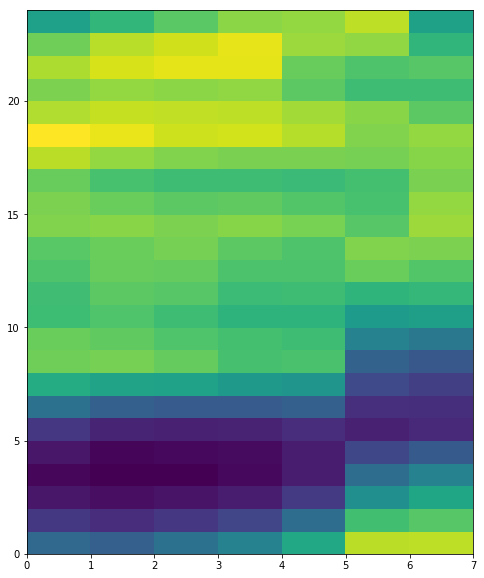

In [37]:
plt.figure(figsize=(8,10))
plt.pcolor(df_norm,
          )

### Number of Trips Perspective

In [41]:
# Count of all completed trips
trips_df = df.pivot_table(values = 'driver_fare', index = 'hour', columns='day_of_week', aggfunc='count')
trips_df = trips_df[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
norm_trips_df = trips_df/trips_df.sum()

In [44]:
norm_trips_df.to_csv('normalized_trips.csv')

In [42]:
norm_trips_df

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,0.021784,0.021630,0.026185,0.031064,0.039516,0.054739,0.062748
1,0.013320,0.011733,0.014743,0.018055,0.026037,0.045799,0.054072
2,0.008558,0.007106,0.008850,0.010418,0.016018,0.035208,0.044501
3,0.005803,0.004738,0.005697,0.006804,0.010392,0.025886,0.033830
4,0.007000,0.005099,0.005755,0.006353,0.008943,0.016502,0.021751
5,0.011996,0.010646,0.010343,0.010199,0.011150,0.008507,0.010280
6,0.028830,0.027493,0.026191,0.025677,0.025154,0.011951,0.011062
7,0.045885,0.046306,0.046616,0.043880,0.041231,0.019362,0.015659
8,0.055619,0.056994,0.056206,0.053330,0.051979,0.025906,0.023674


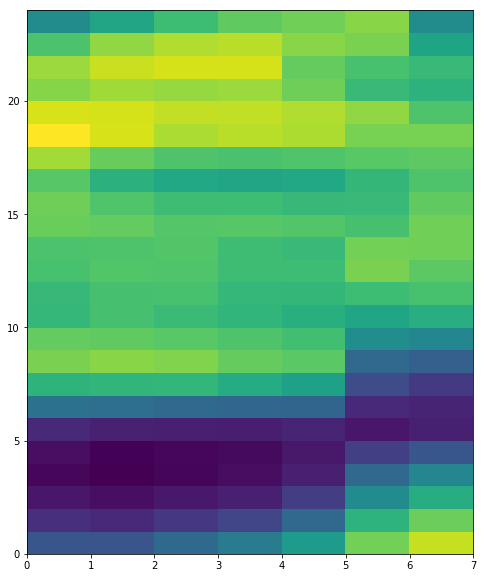

In [43]:
plt.figure(figsize=(8,10))
plt.pcolor(norm_trips_df,
          )

In [47]:
#pulling in reenue_per_trip
revenue_per_trip_df = total_earnings_df / trips_df
revenue_per_trip_df = revenue_per_trip_df[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
revenue_per_trip_df

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,18.413539,17.044589,17.092463,16.771888,16.608444,16.077447,15.334299
1,17.967922,17.496192,16.322976,16.160959,16.123699,15.344219,14.826340
2,16.632957,16.723870,15.518434,15.515864,15.185745,14.805979,14.837526
3,17.072975,17.681742,15.552628,15.896484,15.476097,15.269014,15.256730
4,20.346484,18.809669,18.465020,18.363850,18.120971,16.352083,16.464497
5,19.634804,16.795468,16.818960,17.530176,18.545879,18.763058,19.069615
6,15.234874,13.541028,13.850528,14.170134,14.752502,16.692332,19.169304
7,14.611786,13.792908,13.837788,14.003048,14.061136,14.454458,17.043195
8,14.827653,14.686220,14.776378,14.602390,14.681201,13.931569,14.772590


In [48]:
revenue_per_trip_df.to_csv('revenue_per_trip.csv')

#### Breaking down data by geo

In [49]:
geos_df = pd.read_csv('taxi+_zone_lookup.csv')
geos_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [57]:
print('Number of unique Boroughs:', geos_df['Borough'].nunique())
print('Number of unique Zones:', geos_df['Zone'].nunique())
print('Number of unique Service Zones:', geos_df['service_zone'].nunique())

Number of unique Boroughs: 7
Number of unique Zones: 261
Number of unique Service Zones: 4


In [51]:
geos_df['Borough'].value_counts()

Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: Borough, dtype: int64

In [58]:
geos_df['service_zone'].value_counts()

Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: service_zone, dtype: int64

    I will go with the 'Borough' for geo analysis since it's descriptive without going into too great of details.

In [59]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,driver_fare,day_of_week,hour
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16,8.5,Thursday,7
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14,7.0,Thursday,8


In [61]:
merged_df = pd.merge(df, geos_df, left_on='PULocationID', right_on='LocationID', how = 'left')

merged_df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,driver_fare,day_of_week,hour,LocationID,Borough,Zone,service_zone
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,...,0.0,0.3,11.16,8.5,Thursday,7,161,Manhattan,Midtown Center,Yellow Zone
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,...,0.0,0.3,10.14,7.0,Thursday,8,162,Manhattan,Midtown East,Yellow Zone
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,...,0.0,0.3,23.30,22.5,Thursday,8,137,Manhattan,Kips Bay,Yellow Zone


In [66]:
zones_df = merged_df.groupby('Borough').count()[['VendorID']].sort_values(by = 'VendorID', ascending = False)
zones_df

,VendorID
Borough,
Manhattan,8575567
Queens,549929
Brooklyn,145984
Unknown,128831
Bronx,7296
Staten Island,76
EWR,75


In [68]:
zones_df.columns = ['completed_trips']
zones_df['percent_trips'] = zones_df['completed_trips']/zones_df['completed_trips'].sum()
zones_df

,completed_trips,percent_trips
Borough,,
Manhattan,8575567,0.911542
Queens,549929,0.058455
Brooklyn,145984,0.015517
Unknown,128831,0.013694
Bronx,7296,0.000776
Staten Island,76,0.000008
EWR,75,0.000008


In [69]:
zones_df.to_csv('zones.csv')